In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = {
    "Age": [25, 34, 45, 31, 26, 50, 41, 23, 35, 36, 52, 47, 38, 40, 29],
    "Annual_Income": [40, 50, 60, 55, 42, 85, 75, 37, 63, 58, 90, 80, 66, 72, 48],
    "Spending_Score": [65, 50, 30, 42, 70, 20, 25, 80, 33, 38, 10, 15, 35, 28, 55],
}

In [3]:
df = pd.DataFrame(data)

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [10]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [11]:
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

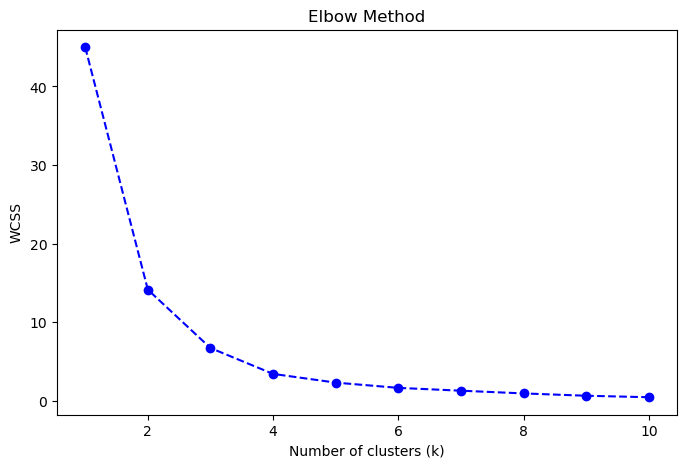

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [13]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

In [14]:
df["Cluster"] = cluster_labels
print("\nClustered Data:")
print(df)


Clustered Data:
    Age  Annual_Income  Spending_Score  Cluster
0    25             40              65        1
1    34             50              50        0
2    45             60              30        0
3    31             55              42        0
4    26             42              70        1
5    50             85              20        2
6    41             75              25        0
7    23             37              80        1
8    35             63              33        0
9    36             58              38        0
10   52             90              10        2
11   47             80              15        2
12   38             66              35        0
13   40             72              28        0
14   29             48              55        1


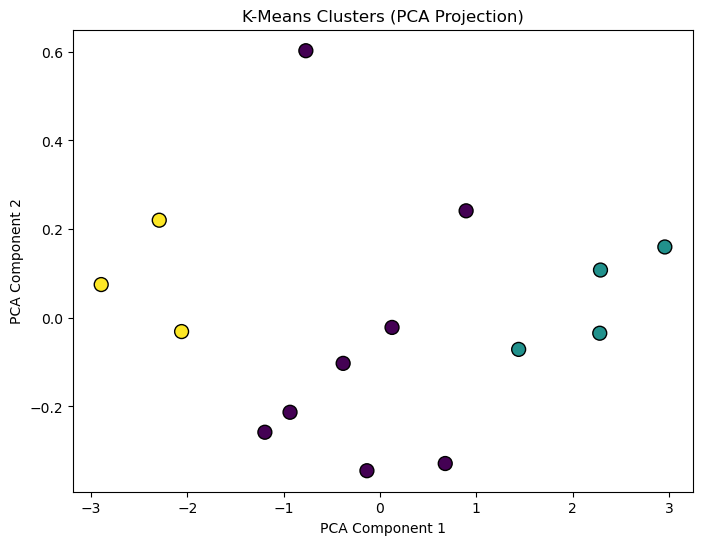

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(
    pca_data[:, 0], pca_data[:, 1],
    c=cluster_labels, cmap='viridis', s=100, edgecolors='k'
)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()